In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid",font_scale=1.5)
pd.set_option("display.max.rows",None)
pd.set_option("display.max.columns",None)


from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

from imblearn.over_sampling import SMOTE

ImportError: cannot import name '_is_arraylike_not_scalar' from 'sklearn.utils.validation' (c:\Users\sophie.porton\anaconda3\envs\machine_learning\lib\site-packages\sklearn\utils\validation.py)

In [16]:
#read in dataframes

x_train= pd.read_csv('x_train.csv')
x_test= pd.read_csv('x_test.csv')
y_train= pd.read_csv('y_train.csv')
y_test= pd.read_csv('y_test.csv')

x_train1=pd.read_csv('x_train1.csv')
x_test1=pd.read_csv('x_test1.csv')
y_train1=pd.read_csv('y_train1.csv')
y_test1=pd.read_csv('y_test1.csv')



Building models for scaled data 
--

In [17]:
training_score = []
testing_score = []

In [18]:
def model_prediction(model):
    model.fit(x_train1,y_train1)
    x_train_pred1 = model.predict(x_train1)
    x_test_pred1 = model.predict(x_test1)
    a = accuracy_score(y_train1,x_train_pred1)*100
    b = accuracy_score(y_test1,x_test_pred1)*100
    training_score.append(a)
    testing_score.append(b)
    
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Precision Score of {model} model is:",precision_score(y_test1,x_test_pred1))
    print(f"Recall Score of {model} model is:",recall_score(y_test1,x_test_pred1))
    print(f"F1 Score of {model} model is:",f1_score(y_test1,x_test_pred1))
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test1,x_test_pred1)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()

Logistic regression 

Accuracy_Score of LogisticRegression() model on Training Data is: 77.94075352315214
Accuracy_Score of LogisticRegression() model on Testing Data is: 76.94077055779184

------------------------------------------------------------------------
Precision Score of LogisticRegression() model is: 0.7518557794273595
Recall Score of LogisticRegression() model is: 0.8093607305936074
F1 Score of LogisticRegression() model is: 0.7795492028587135

------------------------------------------------------------------------
Confusion Matrix of LogisticRegression() model is:


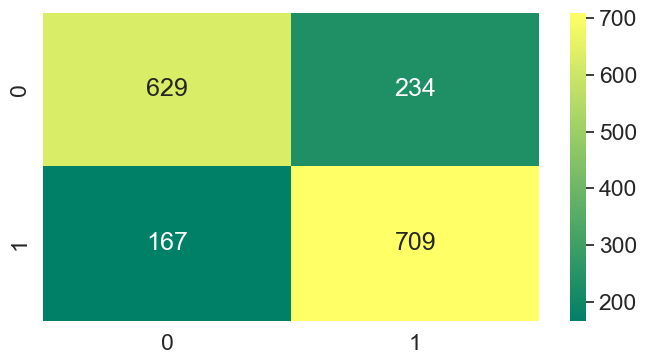

In [19]:
model_prediction(LogisticRegression())

KNeighbors Classifier


Accuracy_Score of KNeighborsClassifier() model on Training Data is: 76.94851883807881
Accuracy_Score of KNeighborsClassifier() model on Testing Data is: 63.19723979298447

------------------------------------------------------------------------
Precision Score of KNeighborsClassifier() model is: 0.6418269230769231
Recall Score of KNeighborsClassifier() model is: 0.6095890410958904
F1 Score of KNeighborsClassifier() model is: 0.6252927400468384

------------------------------------------------------------------------
Confusion Matrix of KNeighborsClassifier() model is:


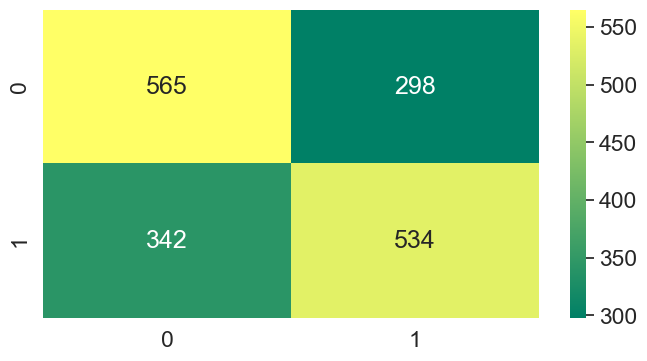

In [20]:
model_prediction(KNeighborsClassifier())

Support-vector-classifier model

Accuracy_Score of SVC() model on Training Data is: 50.4889272361231
Accuracy_Score of SVC() model on Testing Data is: 50.20126509488212

------------------------------------------------------------------------
Precision Score of SVC() model is: 0.5110132158590308
Recall Score of SVC() model is: 0.2648401826484018
F1 Score of SVC() model is: 0.34887218045112783

------------------------------------------------------------------------
Confusion Matrix of SVC() model is:


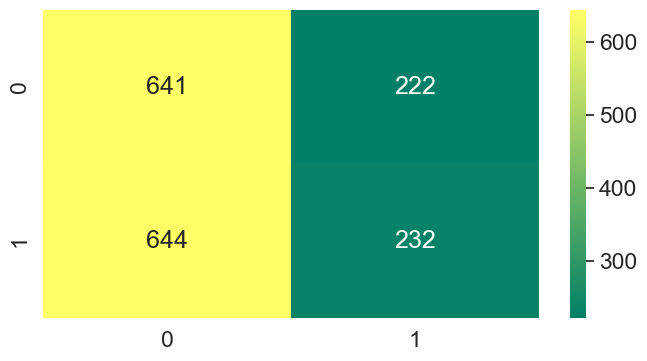

In [21]:
model_prediction(SVC())

Naive-Bayes model

Accuracy_Score of GaussianNB() model on Training Data is: 73.94305435720449
Accuracy_Score of GaussianNB() model on Testing Data is: 73.3755031627372

------------------------------------------------------------------------
Precision Score of GaussianNB() model is: 0.7779273216689099
Recall Score of GaussianNB() model is: 0.6598173515981736
F1 Score of GaussianNB() model is: 0.7140210006176654

------------------------------------------------------------------------
Confusion Matrix of GaussianNB() model is:


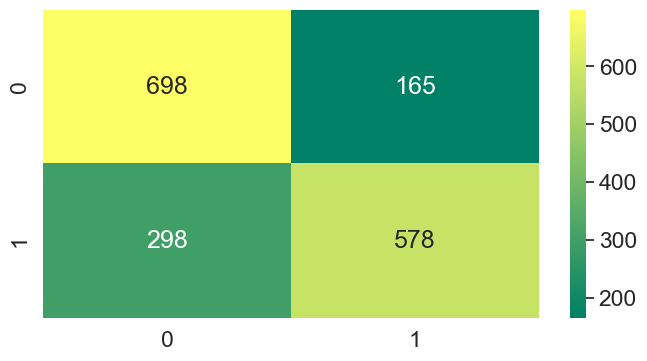

In [22]:
model_prediction(GaussianNB())

Model building for un-scaled data 
--

In [23]:
def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    a = accuracy_score(y_train,x_train_pred)*100
    b = accuracy_score(y_test,x_test_pred)*100
    training_score.append(a)
    testing_score.append(b)
    
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Precision Score of {model} model is:",precision_score(y_test,x_test_pred))
    print(f"Recall Score of {model} model is:",recall_score(y_test,x_test_pred))
    print(f"F1 Score of {model} model is:",f1_score(y_test,x_test_pred))
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test,x_test_pred)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()

Decision-tree classifier 

Accuracy_Score of DecisionTreeClassifier() model on Training Data is: 100.0
Accuracy_Score of DecisionTreeClassifier() model on Testing Data is: 74.69810235767682

------------------------------------------------------------------------
Precision Score of DecisionTreeClassifier() model is: 0.7454954954954955
Recall Score of DecisionTreeClassifier() model is: 0.7557077625570776
F1 Score of DecisionTreeClassifier() model is: 0.7505668934240363

------------------------------------------------------------------------
Confusion Matrix of DecisionTreeClassifier() model is:


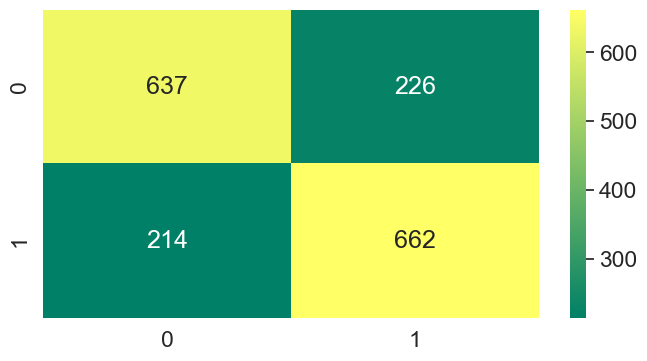

In [24]:
model_prediction(DecisionTreeClassifier())

Random forest classifier 

Accuracy_Score of RandomForestClassifier() model on Training Data is: 100.0
Accuracy_Score of RandomForestClassifier() model on Testing Data is: 80.56354226566992

------------------------------------------------------------------------
Precision Score of RandomForestClassifier() model is: 0.8233173076923077
Recall Score of RandomForestClassifier() model is: 0.7819634703196348
F1 Score of RandomForestClassifier() model is: 0.8021077283372365

------------------------------------------------------------------------
Confusion Matrix of RandomForestClassifier() model is:


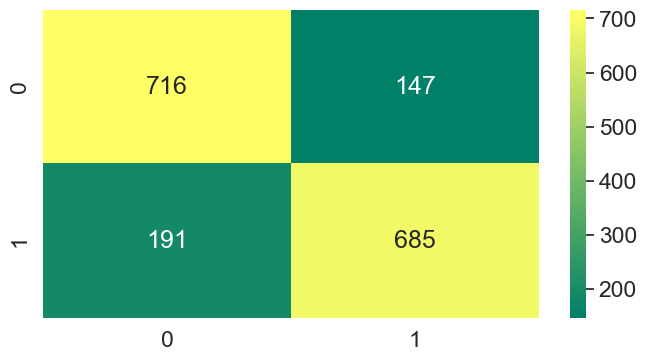

In [25]:
model_prediction(RandomForestClassifier())

Ada-boost classifier

Accuracy_Score of AdaBoostClassifier() model on Training Data is: 80.04026459591603
Accuracy_Score of AdaBoostClassifier() model on Testing Data is: 79.35595169637722

------------------------------------------------------------------------
Precision Score of AdaBoostClassifier() model is: 0.768990634755463
Recall Score of AdaBoostClassifier() model is: 0.843607305936073
F1 Score of AdaBoostClassifier() model is: 0.8045726728361459

------------------------------------------------------------------------
Confusion Matrix of AdaBoostClassifier() model is:


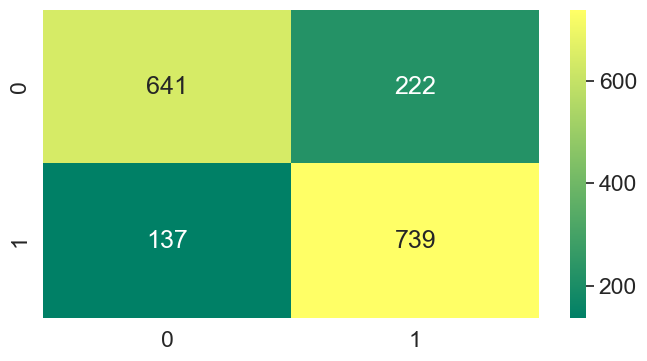

In [26]:
model_prediction(AdaBoostClassifier())

Gradient boosting classifier

Accuracy_Score of GradientBoostingClassifier() model on Training Data is: 82.13977566867989
Accuracy_Score of GradientBoostingClassifier() model on Testing Data is: 79.64347326049453

------------------------------------------------------------------------
Precision Score of GradientBoostingClassifier() model is: 0.7753164556962026
Recall Score of GradientBoostingClassifier() model is: 0.839041095890411
F1 Score of GradientBoostingClassifier() model is: 0.805921052631579

------------------------------------------------------------------------
Confusion Matrix of GradientBoostingClassifier() model is:


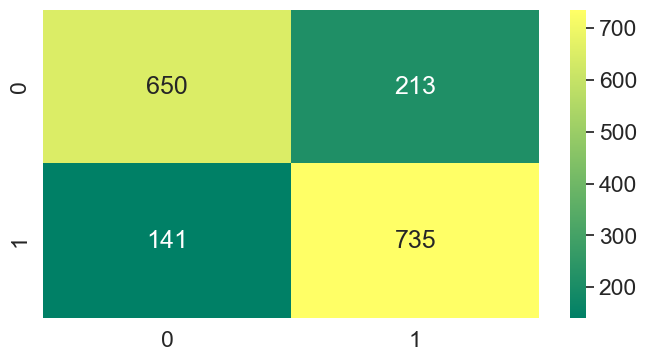

In [27]:
model_prediction(GradientBoostingClassifier())

LGMB Classifier-- errror


XGB Classifier model

Accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) model on Training Data is: 94.37733678458441
Accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_st

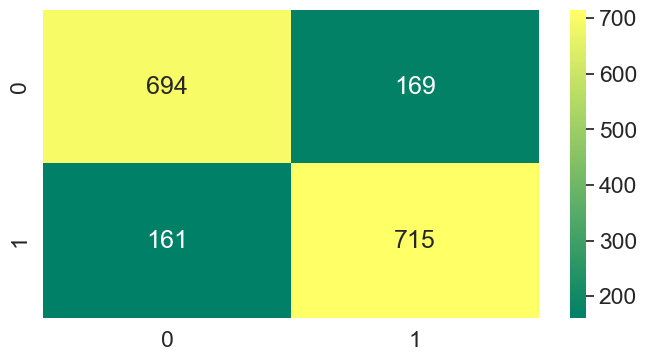

In [29]:
model_prediction(XGBClassifier())

Cat boost classifier

Accuracy_Score of <catboost.core.CatBoostClassifier object at 0x000002A520471CD0> model on Training Data is: 88.28012654587289
Accuracy_Score of <catboost.core.CatBoostClassifier object at 0x000002A520471CD0> model on Testing Data is: 80.96607245543416

------------------------------------------------------------------------
Precision Score of <catboost.core.CatBoostClassifier object at 0x000002A520471CD0> model is: 0.8011049723756906
Recall Score of <catboost.core.CatBoostClassifier object at 0x000002A520471CD0> model is: 0.8276255707762558
F1 Score of <catboost.core.CatBoostClassifier object at 0x000002A520471CD0> model is: 0.8141493542953397

------------------------------------------------------------------------
Confusion Matrix of <catboost.core.CatBoostClassifier object at 0x000002A520471CD0> model is:


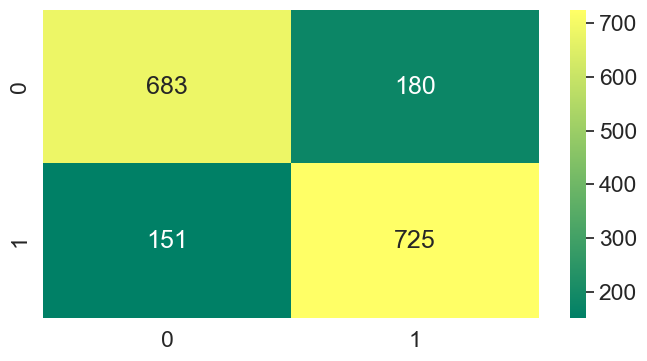

In [30]:
model_prediction(CatBoostClassifier(verbose=False))

All model performance comparison
--

In [31]:
models = ["Logistic Regression","KNN","SVM","Naive Bayes","Decision Tree","Random Forest","Ada Boost",
          "Gradient Boost","XGBoost","CatBoost"]

In [32]:
df = pd.DataFrame({"Algorithms":models,
                   "Training Score":training_score,
                   "Testing Score":testing_score})

df

,Algorithms,Training Score,Testing Score
0,Logistic Regression,77.940754,76.940771
1,KNN,76.948519,63.197240
2,SVM,50.488927,50.201265
3,Naive Bayes,73.943054,73.375503
4,Decision Tree,100.000000,74.698102
5,Random Forest,100.000000,80.563542
6,Ada Boost,80.040265,79.355952
7,Gradient Boost,82.139776,79.643473
8,XGBoost,94.377337,81.023577
9,CatBoost,88.280127,80.966072


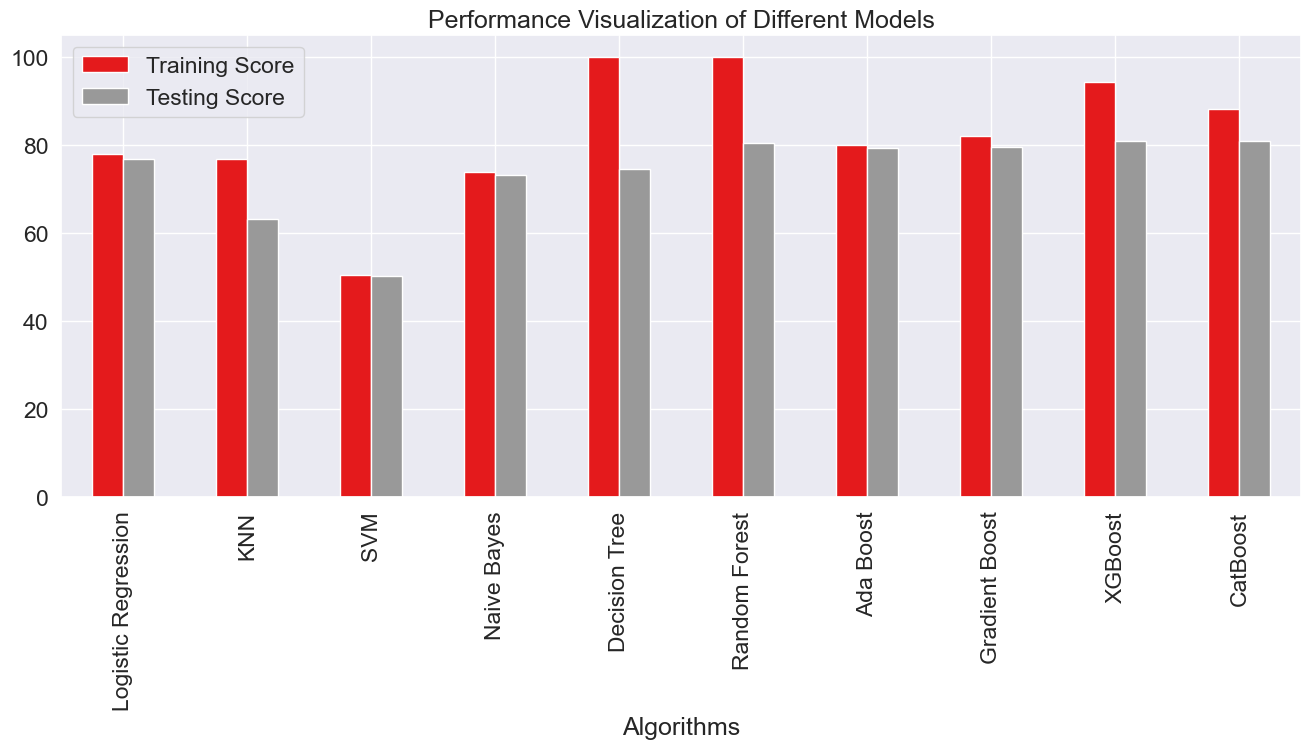

In [33]:
df.plot(x="Algorithms",y=["Training Score","Testing Score"], figsize=(16,6),kind="bar",
        title="Performance Visualization of Different Models",colormap="Set1")
plt.show()